# Model Development


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df=pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Linear Regression
* One independent variable and one predictoe variable
*   **Yhat=a+bX**
* a=intercept
* b=slope/ coefficient of variable

In [35]:
from sklearn.linear_model import LinearRegression  # load modules for linear regression

In [8]:
lm=LinearRegression()   # create linear regresion object
lm

LinearRegression()

### How could "highway-mpg" help us to predict price?

In [9]:
X=df[["highway-mpg"]]
Y=df['price']
lm.fit(X,Y)

LinearRegression()

In [10]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [14]:
# what is value of intercept (a)?
lm.intercept_

38423.3058581574

In [15]:
# what is the value of slope (b)?
lm.coef_

array([-821.73337832])

In [25]:
# what is the final estimated linear model?
print("yhat=",lm.intercept_ ,"+", lm.coef_,"Highway-mpg")

yhat= 38423.3058581574 + [-821.73337832] Highway-mpg


In [26]:
# create linear regression object lm1
lm1=LinearRegression()
lm1

LinearRegression()

In [27]:
# Train the model using "engine-size" as the independent variable and "price" as the dependent variable?
X1=df[["engine-size"]]
Y1=df['price']
lm1.fit(X1,Y1)

LinearRegression()

In [32]:
yhat=lm.predict(X1)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [34]:
print("yhat1/price = ",lm1.intercept_,"+",lm1.coef_,"*engine-size")

yhat1/price =  -7963.338906281042 + [166.86001569] *engine-size


### Multiple linear Regression
One independent variable and two or more predictor variable

**Yhat=a+b1X1+b2X2+b3X3**

In [72]:
Z= df[["horsepower","curb-weight","engine-size","highway-mpg"]]
lm.fit(Z,df['price'])

LinearRegression()

In [38]:
lm.intercept_

-15806.624626329209

In [39]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [41]:
print("yhat=",lm.intercept_,"+",lm.coef_[0],"*horsepower + ",lm.coef_[1],"*curb-weight  + ",lm.coef_[2],"*engine-size + ",lm.coef_[3],"*highway-mpg")

yhat= -15806.624626329209 + 53.495744226049126 *horsepower +  4.707700994613935 *curb-weight  +  81.53026382122759 *engine-size +  36.05748881648596 *highway-mpg


In [56]:
# Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".
z1=df[["normalized-losses","highway-mpg"]]
lm2=LinearRegression()
lm2.fit(z1,df['price'])

LinearRegression()

In [57]:
Yhat=lm2.predict(df['price'])
yhat[0:5]

ValueError: Expected 2D array, got 1D array instead:
array=[13495. 16500. 16500. 13950. 17450. 15250. 17710. 18920. 23875. 16430.
 16925. 20970. 21105. 24565. 30760. 41315. 36880.  5151.  6295.  6575.
  5572.  6377.  7957.  6229.  6692.  7609.  8558.  8921. 12964.  6479.
  6855.  5399.  6529.  7129.  7295.  7295.  7895.  9095.  8845. 10295.
 12945. 10345.  6785. 11048. 32250. 35550. 36000.  5195.  6095.  6795.
  6695.  7395. 10945. 11845. 13645. 15645.  8845.  8495. 10595. 10245.
 10795. 11245. 18280. 18344. 25552. 28248. 28176. 31600. 34184. 35056.
 40960. 45400. 16503.  5389.  6189.  6669.  7689.  9959.  8499. 12629.
 14869. 14489.  6989.  8189.  9279.  9279.  5499.  7099.  6649.  6849.
  7349.  7299.  7799.  7499.  7999.  8249.  8949.  9549. 13499. 14399.
 13499. 17199. 19699. 18399. 11900. 13200. 12440. 13860. 15580. 16900.
 16695. 17075. 16630. 17950. 18150.  5572.  7957.  6229.  6692.  7609.
  8921. 12764. 22018. 32528. 34028. 37028.  9295.  9895. 11850. 12170.
 15040. 15510. 18150. 18620.  5118.  7053.  7603.  7126.  7775.  9960.
  9233. 11259.  7463. 10198.  8013. 11694.  5348.  6338.  6488.  6918.
  7898.  8778.  6938.  7198.  7898.  7788.  7738.  8358.  9258.  8058.
  8238.  9298.  9538.  8449.  9639.  9989. 11199. 11549. 17669.  8948.
 10698.  9988. 10898. 11248. 16558. 15998. 15690. 15750.  7775.  7975.
  7995.  8195.  8495.  9495.  9995. 11595.  9980. 13295. 13845. 12290.
 12940. 13415. 15985. 16515. 18420. 18950. 16845. 19045. 21485. 22470.
 22625.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [58]:
lm2.intercept_

38201.31327245728

In [59]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [60]:
print("yhat = ",lm2.intercept_,"+",lm2.coef_[0],"*normalized-losses  ",lm2.coef_[1],"*highway-mpg")

yhat =  38201.31327245728 + 1.4978958634133213 *normalized-losses   -820.4543401631865 *highway-mpg


### Model evaluation using visualization

In [61]:
import seaborn as sns
%matplotlib inline

### Regression plot
**highway-mpg** as predictor variable of **price**

(0.0, 48174.39482551351)

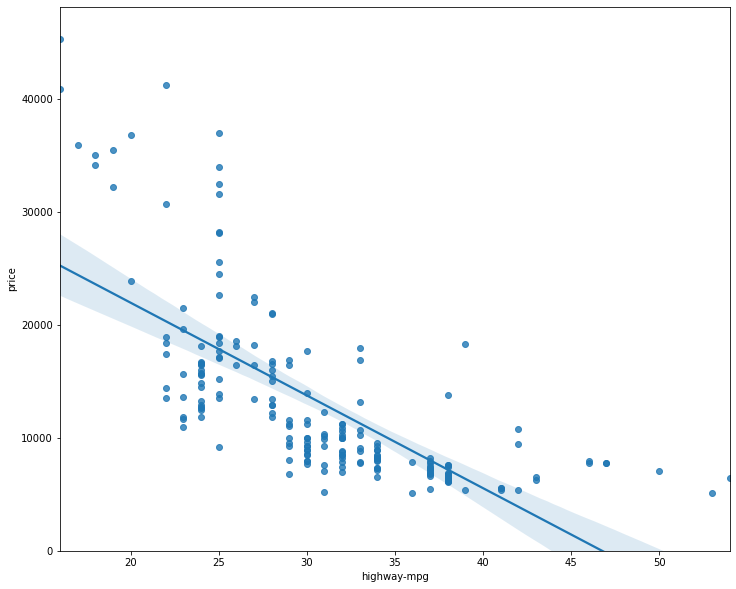

In [62]:
width= 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

(0.0, 47414.1)

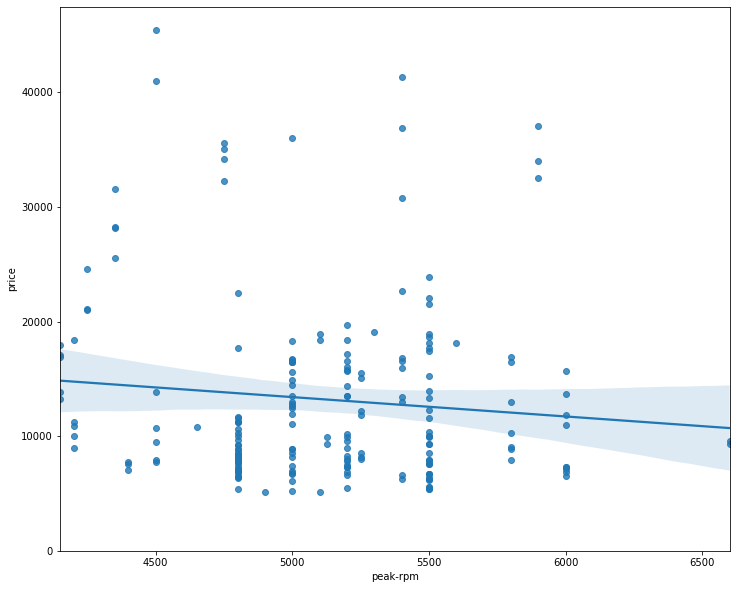

In [65]:
plt.figure(figsize=(width,height))
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

In [68]:
df[["highway-mpg","peak-rpm","price"]].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


### Residual plot
* visualize variance of data
* the difference between observed value(y) and predicted value(yhat) is called residual (e).
* A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.
* spread of residual points in graph islinear model is good fit because spreding means constan variance

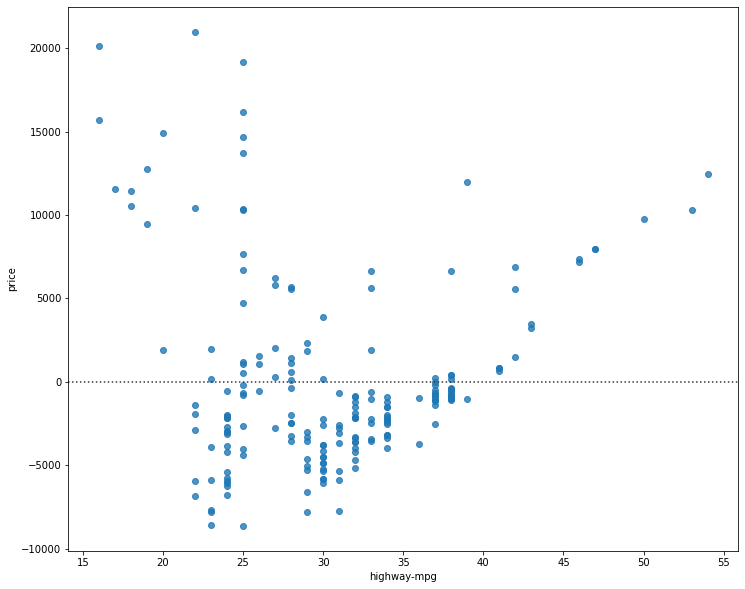

In [70]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.residplot(x="highway-mpg",y="price",data=df)
plt.show()   # here not randomly spread shows curve so model is not fit

### Multiple linear regression
#### Distribution plot

In [73]:
yhat=lm.predict(Z)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


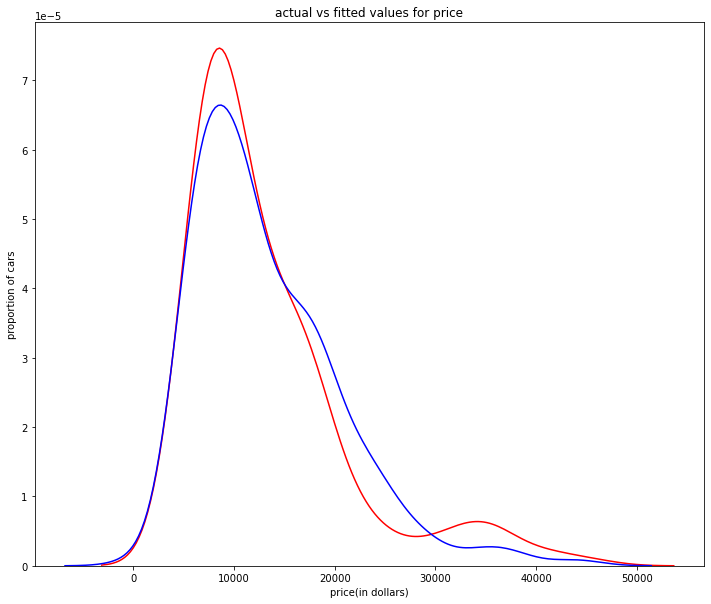

In [78]:
plt.figure(figsize=(width,height))
ax1=sns.distplot(df['price'], hist=False, color='r',label="Actual value")
sns.distplot(yhat,hist=False,color='b',label="fitted valve",ax=ax1)
plt.title("actual vs fitted values for price")
plt.xlabel("price(in dollars)")
plt.ylabel("proportion of cars")
plt.show()
plt.close()

#### polynomial regression and pipelines


In [79]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [80]:
x = df['highway-mpg']
y = df['price']

In [81]:
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


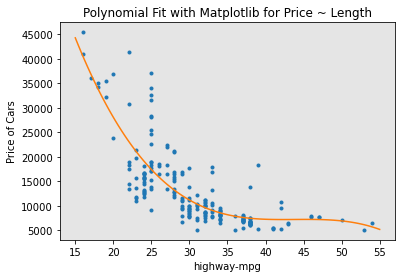

In [83]:
PlotPolly(p,x,y,'highway-mpg')

In [85]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


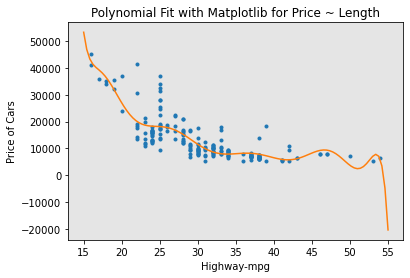

In [88]:
f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'Highway-mpg')

In [89]:
    from sklearn.preprocessing import PolynomialFeatures

In [90]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [91]:
Z_pr=pr.fit_transform(Z)

In [92]:
Z.shape

(201, 4)

In [93]:
Z_pr.shape

(201, 15)

### Pipelines

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [96]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [97]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [98]:
Z=Z.astype('float')
y=df['price']
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [99]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [102]:
# create pipeline for z and y using linear regression
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)
Z=Z.astype('float')
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

### Measures for in-sample evaluation
* R-squared error
* mean squared error[MSE]
#### Model1: Simple linear regression

In [103]:
lm.fit(X,Y)
print("the R square is ",lm.score(X,Y))
Yhat=lm.predict(X)
print("The output of first four predicted values are",Yhat[0:4])
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df['price'],Yhat)
print("mean squared error" ,mse)


the R square is  0.4965911884339176
The output of first four predicted values are [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]
mean squared error 31635042.944639888


### Model2 : Multiple linear regression

In [105]:
lm.fit(Z,Y)
print("the R square is ",lm.score(Z,Y))
Y_predict_multi=lm.predict(Z)
print("The output of first four predicted values are",Y_predict_multi[0:4])
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df['price'],Y_predict_multi)
print("mean squared error" ,mse)


the R square is  0.8093562806577457
The output of first four predicted values are [13699.11161184 13699.11161184 19051.65470233 10620.36193015]
mean squared error 11980366.87072649


### Model3  Polynomial fit

In [106]:
from sklearn.metrics import r2_score

In [108]:
r_squared=r2_score(y,p(x))
print("the r_squared value is",r_squared)
mean_squared_error(df['price'],p(x))

the r_squared value is 0.7023769097193064


18703127.609259635

## prediction and decision making

In [110]:
new_input=np.arange(1,100,1).reshape(-1,1)

In [111]:
lm.fit(X,Y)
lm

LinearRegression()

In [112]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

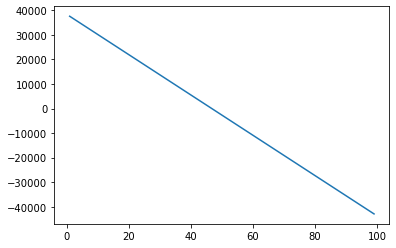

In [113]:
plt.plot(new_input,yhat)
plt.show()

### Decision
we have to compare SLR,MLR,PF models r2_square and mse.
which model have high r2_score and MSE  is good fit
Between SLR and MLR values of mse and r2 score of slr is smaller compare to values of mse and r2 score of MLR so MLR is good fit.
Between SLR and PF values of mse and r2 score of PF is smaller than SLR so SLR is good fit.
Between MLR and Pf values of mse  of MLR is smaller than mse of PF and r2 score of MLR ig greater than r2 score of PF so Mlr is good fit.

On all these models MLR(Multiple linear regression) is goodfit